In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-28 08:01:07.043686: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 08:01:07.043807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 08:01:07.224496: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_data.copy()
y=X.pop('label')
print(X.shape,y.shape)
X_test = test_data.copy()

(42000, 784) (42000,)


In [5]:
X = X/255
X_test = X_test/255
X = X.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [6]:
y = keras.utils.to_categorical(y)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

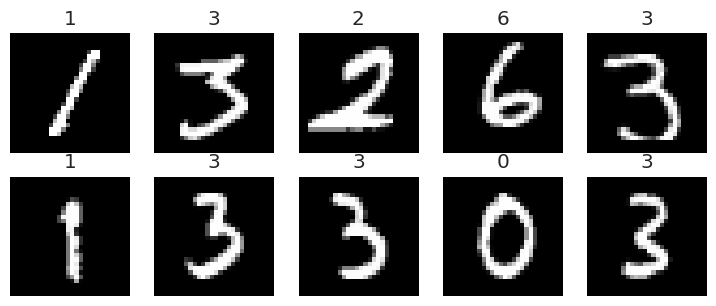

In [8]:
plt.figure(figsize=(9,9))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

In [9]:
model = Sequential([
    Conv2D(32, (5,5), activation='relu' ,padding='same', input_shape=[28,28,1]),
    MaxPooling2D(2),
    BatchNormalization(),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2),
    BatchNormalization(),
    Flatten(),
    Dropout(0.25),
    Dense(50,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        80,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,370 (524.88 KB)

 Trainable params: 134,178 (524.13 KB)

 Non-trainable params: 192 (768.00 B)

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False
)

datagen.fit(X_train)

In [14]:
history=model.fit(
          datagen.flow(X_train,y_train),
          batch_size=128,
          epochs=30,
          callbacks=[early_stopping],
          validation_data = (X_val,y_val)
         )

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  14/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.1642 - loss: 2.3099

I0000 00:00:1709107296.430704      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709107296.450470      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8030 - loss: 0.5955

W0000 00:00:1709107311.517164      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8040 - loss: 0.5926 - val_accuracy: 0.9806 - val_loss: 0.0690
Epoch 2/30
   5/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9517 - loss: 0.1723  

W0000 00:00:1709107312.445230      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9665 - loss: 0.1118 - val_accuracy: 0.9740 - val_loss: 0.0905
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9741 - loss: 0.0843 - val_accuracy: 0.9800 - val_loss: 0.0675
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9777 - loss: 0.0705 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9801 - loss: 0.0612 - val_accuracy: 0.9869 - val_loss: 0.0491
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9854 - val_loss: 0.0516
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9681 - val_loss: 0.1324
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9866 - loss: 0.0429 - val_accuracy: 0.9882 - val_loss: 0.0464
Epoch 9/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9861 - loss: 0.04

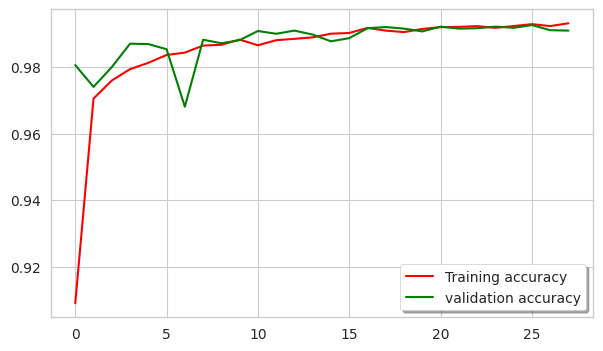

In [15]:
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], color='r', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='g', label="validation accuracy")
plt.legend(loc='best', shadow=True)
plt.show()

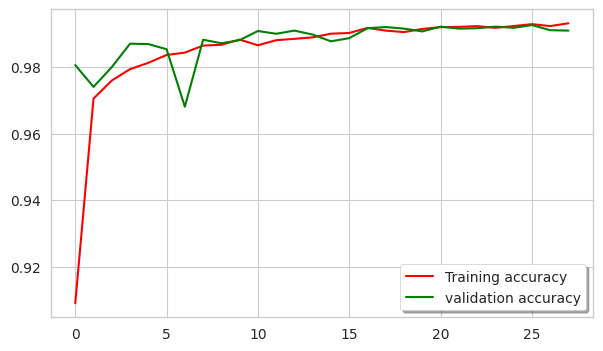

In [16]:
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], color='r', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='g', label="validation accuracy")
plt.legend(loc='best', shadow=True)
plt.show()

In [17]:
my_results = model.predict(X_test)
my_results = np.argmax(my_results, axis=1)
labels = pd.Series(my_results, name='Label')
imageIds = pd.Series(range(1,28001), name='ImageId')

111/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

W0000 00:00:1709107709.693597      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [18]:
y_trainpr = model.predict(X_train)
y_valpr = model.predict(X_val)
print("Training accuracy =",sum(p == a for p, a in zip(y_trainpr, y_train))/len(y_trainpr))
print("Validation accuracy =",sum(p == a for p, a in zip(y_valpr, y_val))/len(y_valpr))

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training accuracy = [0.00300595 0.02107143 0.07690476 0.07327381 0.01720238 0.05815476
 0.03622024 0.01583333 0.05232143 0.0433631 ]
Validation accuracy = [0.00392857 0.02107143 0.07738095 0.07416667 0.01678571 0.05511905
 0.03714286 0.01821429 0.05488095 0.04440476]


In [19]:
my_submission = pd.concat([imageIds, labels], axis=1)
my_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [20]:
my_submission.to_csv("digit_recognition_neural_network.csv",index=False)